In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

In [2]:
# load all the data on the animes and users
with open('full_list_final.pickle', 'rb') as infile:
    final=pickle.load(infile)

infile.close()

In [20]:
# load the animes and their types
anime_types = pd.read_csv('anime_types.csv', index_col=0)

In [3]:
df = pd.DataFrame.from_dict(final)

In [13]:
# change the order of columns in df
df = df[['title', 'genres', 'user', 'ratings']]

In [7]:
# blank ratings mean user did NOT rate the anime
# replace all blank ratings with 0 as placeholder
df['ratings'] = df['ratings'].replace('', value = 0)

In [8]:
# make ratings floats instead of strings
df['ratings'] = df['ratings'].astype('float64')

In [9]:
# RUN THIS ONLY ONCE!!

# change ratings scale from 1-5 to 1-10
df.ratings = df.ratings*2

In [10]:
# make updated ratings into ints
df['ratings'] = df['ratings'].astype('int64')

In [22]:
# merge anime types with rest of the anime data
df = df.merge(anime_types, on='title')

In [282]:
# get rid of anime music videos
df = df[df.type != 'Video']

In [283]:
# get only users that rated something (not 0 ratings)
only_rated_users = df[df.ratings > 0]

In [284]:
# get how many times each anime got rated
num_of_ratings = only_rated_users.groupby('title').count()[['ratings']].sort_values(by='ratings')

In [285]:
num_of_ratings.tail()

,ratings
title,
Shouwa Genroku Rakugo Shinjuu,167
Terra Formars,167
Descending Stories: Shouwa Genroku Rakugo Shinjuu,168
Kokkoku: Moment by Moment,169
Death Note,175


In [286]:
# get the ratings and the count of how many time the rating appears
ratings_count = only_rated_users['ratings'].value_counts().sort_values()

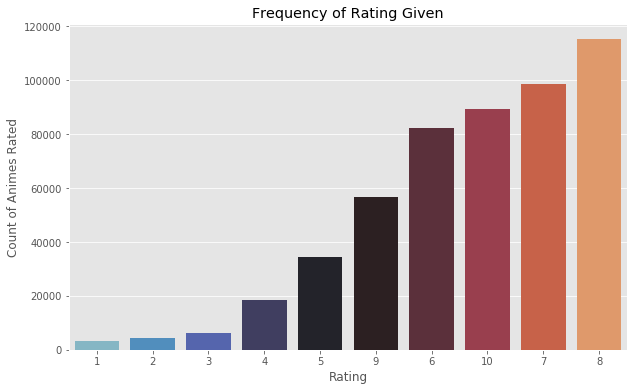

In [287]:
# graph which rating appears most
plt.style.use('ggplot')

plt.figure(figsize=(10,6))
ax = sns.barplot(ratings_count.index, ratings_count.values, palette='icefire', order=ratings_count.index)
ax.set_xlabel('Rating')
ax.set_ylabel('Count of Animes Rated')
ax.set_title('Frequency of Rating Given')
plt.show()

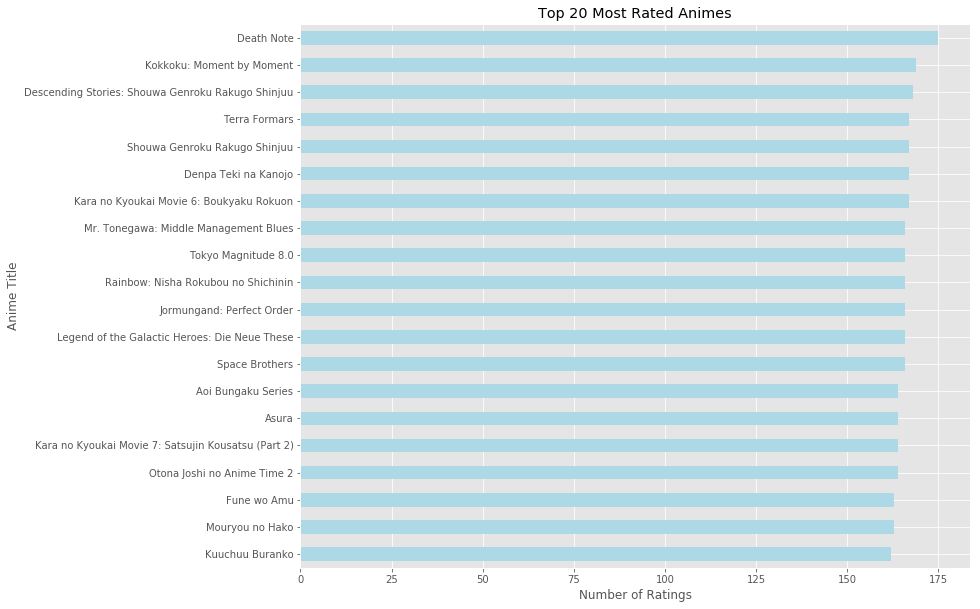

In [332]:
# graph Top 20 Most Rated Animes
ax1 = num_of_ratings[-20:].plot(kind='barh', figsize=(12,10), color='lightblue')
ax1.set_xlabel('Number of Ratings')
ax1.set_ylabel('Anime Title')
ax1.set_title('Top 20 Most Rated Animes')
ax1.legend().remove()
plt.show()

In [289]:
# get the counts of each type of anime thats in the data
count_types = only_rated_users.groupby('type').count()[['title']].sort_values(by='title')

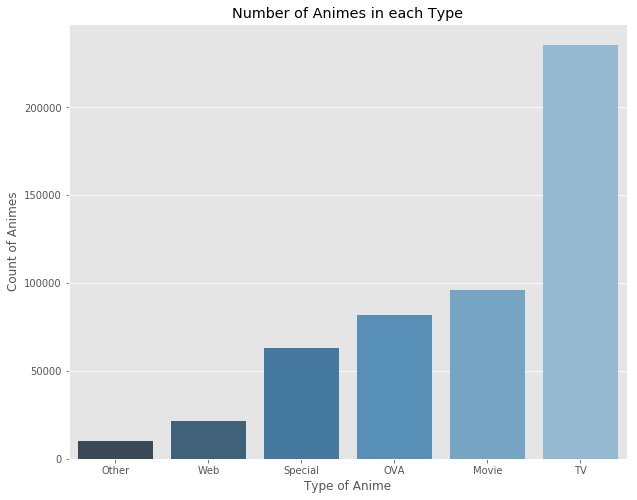

In [290]:
# graph how many of each type of anime is in the data
plt.figure(figsize=(10,8))
ax2 = sns.barplot(count_types.index, count_types.title, palette='Blues_d')
ax2.set_xlabel('Type of Anime')
ax2.set_ylabel('Count of Animes')
ax2.set_title('Number of Animes in each Type')
plt.show()

In [291]:
# get only users that rated at least 5 animes
rated_5 = only_rated_users.groupby('user').filter(lambda x: len(x) >= 5)

In [292]:
# get the average of each anime's ratings
avg_anime_ratings = rated_5.groupby('title').mean().sort_values(by='ratings')

In [293]:
avg_anime_ratings.tail(20)

,ratings
title,
Clannad After Story,8.924370
Gintama',8.926471
City Hunter Movie: Shinjuku Private Eyes,8.937500
Descending Stories: Shouwa Genroku Rakugo Shinjuu,8.949367
Monster,8.968153
Code Geass: Lelouch of the Rebellion,8.968992
I Want to Eat Your Pancreas,8.969231
A Silent Voice,8.981132
Doupo Cangqiong 3rd Season,9.000000


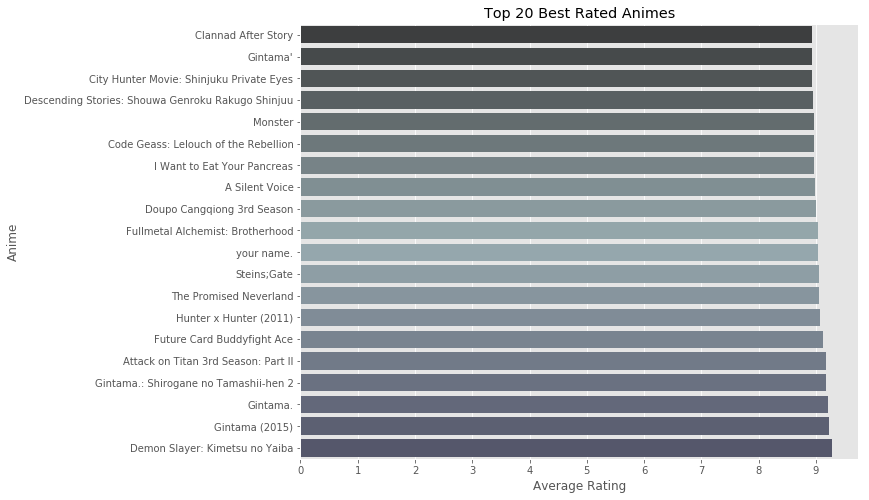

In [317]:
plt.figure(figsize=(10,8))
ax3 = sns.barplot(avg_anime_ratings.tail(20).ratings, avg_anime_ratings.tail(20).index, palette='bone_d')
ax3.set_xlabel('Average Rating')
ax3.set_ylabel('Anime')
ax3.set_title('Top 20 Best Rated Animes')
ax3.set_xticks(range(10))
plt.show()

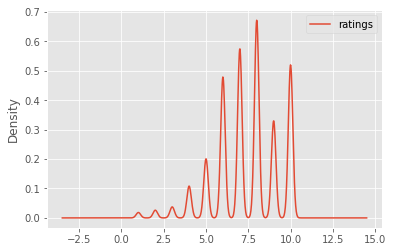

In [334]:
only_rated_users.plot.kde()

In [ ]:
only_rated_users.user.value_counts()